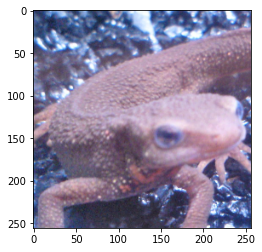

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

In [2]:
# Q.6 減色, color subtraction(色の複雑さをある程度抑える)

# 医用画像には，CTやMRIのようなディジタル撮影装置を利用して撮影されるディジタル画像と，
# X線フィルムに代表されるアナログ画像がある．
# アナログ画像をコンピュータで解析するためには
# ディジタル化（＝A/D変換：Analog-to-Digital conversion）を行わなければならない．

# 　ディジタル化の基本原理は
# ，”標本化”と”量子化”で成りなっている．
# 最初に標本化を行い，その後に量子化を行う．
# この順番を入れ替えることはできない．
# 画像においては標本化は空間分解能を，量子化は濃度分解能を決定する

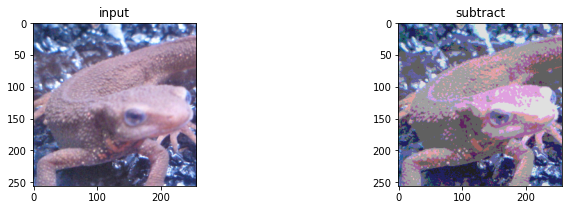

In [9]:
def color_subtraction(img, div=4):
    th = 256//div
#     //2をしているのは各区間の中央値
    return np.clip(img//th * th + th // 2, 0, 255)
img_sub = color_subtraction(img_orig) # color subtract
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('subtract')
plt.imshow(img_sub)
plt.show();

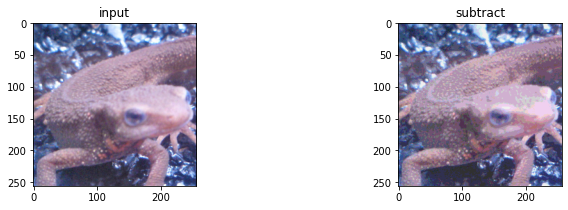

In [10]:
img_sub = color_subtraction(img_orig, div=8)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('subtract')
plt.imshow(img_sub)

In [34]:
# Q.7 平均プーリング, average pooling(グリッド分割し、その領域内の代表値を求める操作はPooling(プーリング) と呼ばれる)
def pool_average(img, ksize_h = 8, ksize_w = 8):
    _img = img.copy().astype(np.float32)
    
    # padding
    h, w = img.shape[:2]
    outer_h = h%ksize_h
    pad_top = outer_h//2
    pad_bottom = outer_h - pad_top
    outer_w = w%ksize_w
    pad_left =outer_w // 2
    pad_right = outer_w - pad_left
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img) 
#     print(out.shape)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy : iy + ksize_h, ix: ix + ksize_w, ic] = _img[iy: iy + ksize_h, ix: ix + ksize_w, ic].mean()
    
#     print(out.shape, pad_top, h, pad_left, w)
    out = out[pad_top:pad_top + h, pad_left: pad_left + w]
#     print(out.shape)
    return np.clip(out, 0, 255).astype(np.uint8)

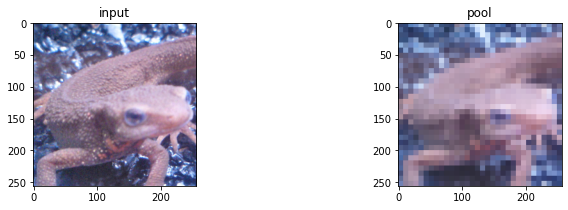

In [35]:
img_pool = pool_average(img_orig)

plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('pool')
plt.imshow(img_pool)
plt.show();

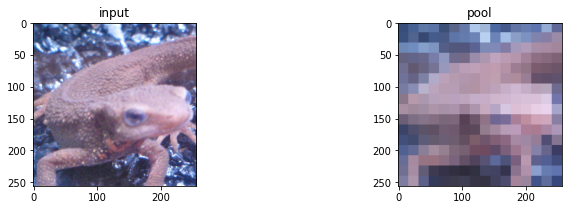

In [36]:
img_pool = pool_average(img_orig, ksize_h=16, ksize_w=16)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('pool')
plt.imshow(img_pool)
plt.show()

In [37]:
# Q.8 最大プーリング, max pooling
def pool_max(img, ksize_h = 8, ksize_w = 8):
    _img = img.copy().astype(np.float32)
    
    # padding
    h, w = img.shape[:2]
    outer_h = h%ksize_h
    pad_top = outer_h//2
    pad_bottom = outer_h - pad_top
    outer_w = w%ksize_w
    pad_left =outer_w // 2
    pad_right = outer_w - pad_left
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img) 
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy : iy + ksize_h, ix: ix + ksize_w, ic] = _img[iy: iy + ksize_h, ix: ix + ksize_w, ic].max()
    
    out = out[pad_top:pad_top + h, pad_left: pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

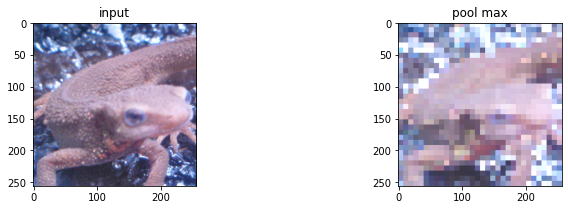

In [38]:
img_pool = pool_max(img_orig)

plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('pool max')
plt.imshow(img_pool)
plt.show();

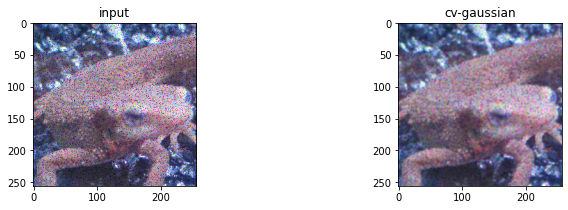

In [41]:
# Q.9 ガウシアンフィルタ, gaussian filter
img_noise_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')

# opencv
img_gau = cv2.GaussianBlur(img_noise_orig, (3,3), 1.3)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_noise_orig)
plt.subplot(1, 2, 2)
plt.title('cv-gaussian')
plt.imshow(img_gau)
plt.show()

In [48]:
def filter_gaussian(img, ksize=(3, 3), sigma=1.3):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right= ksize_w, ksize_w

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w =out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # prepare kernel
    k = np.zeros([ksize_h, ksize_w])
    for iy in range(ksize_h):
        for ix in range(ksize_w):
            k[iy, ix] = 1 / (2 * np.pi * (sigma ** 2)) * np.exp(-((ix - ksize_w //2) ** 2 + (iy - ksize_h//2) ** 2)/(2 * sigma ** 2))
    
    k /= k.sum()
    
    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = np.sum(_img[iy : iy + ksize_h, ix : ix + ksize_w, ic] * k)
    
    out = out[pad_top: pad_top + h, pad_left: pad_left +w]
    return np.clip(out, 0, 255).astype(np.uint8)

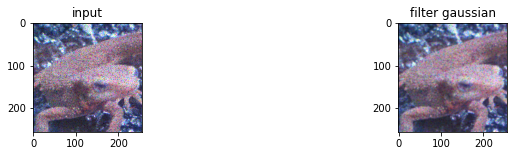

In [49]:
img_gau = filter_gaussian(img_noise_orig, (3, 3), 1.3)
plt.figure(figsize=(12, 2))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_noise_orig)
plt.subplot(1, 2, 2)
plt.title('filter gaussian')
plt.imshow(img_gau)
plt.show();


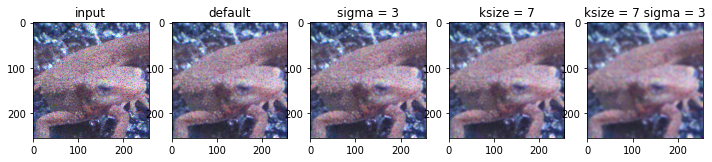

In [54]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.title('input')
plt.imshow(img_noise_orig)

plt.subplot(1, 5, 2)
plt.title('default')
img_gau = filter_gaussian(img_noise_orig, (3, 3), 1.3)
plt.imshow(img_gau)

plt.subplot(1, 5, 3)
plt.title('sigma = 3')
img_gau = filter_gaussian(img_noise_orig, (3, 3), 3)
plt.imshow(img_gau)

plt.subplot(1, 5, 4)
plt.title('ksize = 7')
img_gau = filter_gaussian(img_noise_orig, (7, 7), 1.3)
plt.imshow(img_gau)

plt.subplot(1, 5, 5)
plt.title('ksize = 7 sigma = 3')
img_gau = filter_gaussian(img_noise_orig, (7, 7), 3)
plt.imshow(img_gau)
plt.show()

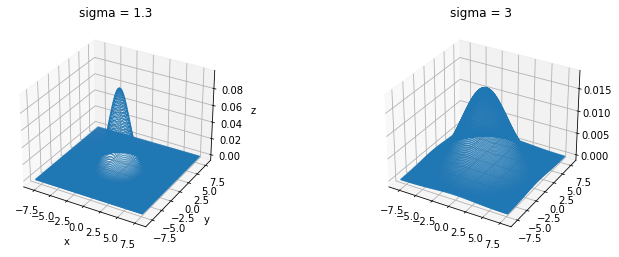

In [56]:
# gaussian filterについて
from mpl_toolkits.mplot3d import Axes3D

def gaussian(sigma):
    x = np.arange(-8, 8, 0.1)
    y = np.arange(-8, 8, 0.1)
    x, y = np.meshgrid(x, y)
    z = 1/ (2 * np.pi *(sigma ** 2)) * np.exp(- (x ** 2 + y ** 2) / (2 * sigma ** 2))
    return x, y, z

fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
x, y, z = gaussian(1.3)
ax.scatter3D(x, y, z, s = 1, marker='.')
ax.set_xlabel('x');ax.set_ylabel('y');ax.set_zlabel('z')
ax.set_title('sigma = 1.3')

ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
x, y, z = gaussian(3)
ax2.scatter3D(x, y, z, s = 1, marker='.')
ax2.set_title('sigma = 3')

plt.show();

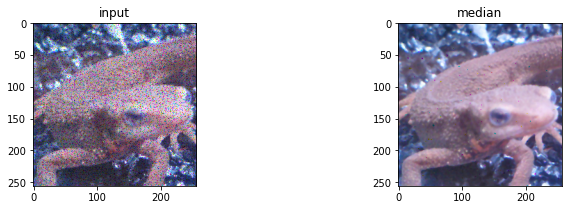

In [58]:
# Q.10 メディアンフィルタ, median filter

# opencv
img_med = cv2.medianBlur(img_noise_orig, 3)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_noise_orig)
plt.subplot(1, 2, 2)
plt.title('median')
plt.imshow(img_med)
plt.show()

In [59]:
def filter_median(img, ksize=(3, 3)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right= ksize_w, ksize_w

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w =out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = np.median(_img[iy : iy + ksize_h, ix : ix + ksize_w, ic])
    
    out = out[pad_top: pad_top + h, pad_left: pad_left +w]
    return np.clip(out, 0, 255).astype(np.uint8)

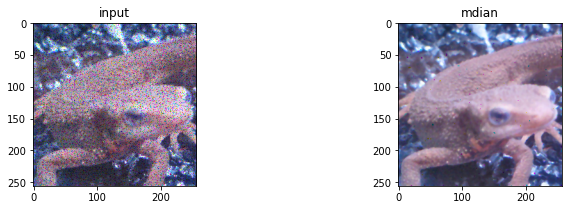

In [60]:
img_med = filter_median(img_noise_orig, (3, 3))
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_noise_orig)
plt.subplot(1, 2, 2)
plt.title('mdian')
plt.imshow(img_med)
plt.show();


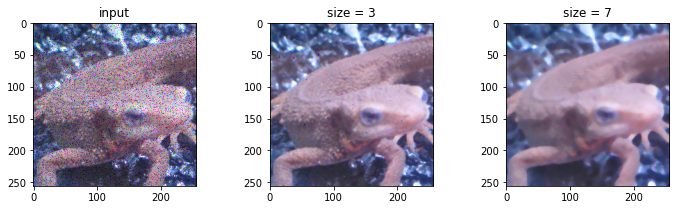

In [61]:
# kernel sizeを大きくしたとき
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_noise_orig)

plt.subplot(1, 3, 2)
plt.title('size = 3')
img_med = filter_median(img_noise_orig, (3, 3))
plt.imshow(img_med)

plt.subplot(1, 3, 3)
plt.title('size = 7')
img_med = filter_median(img_noise_orig, (7, 7))
plt.imshow(img_med)
plt.show()

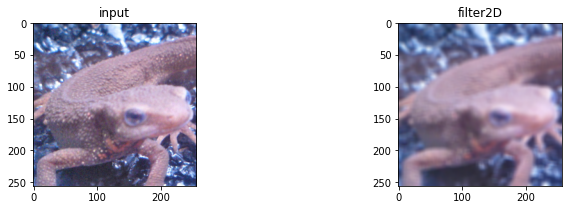

In [64]:
# opencv
# ウィンドウ内の画素値の平均を取るkernelを設定
kernel = np.ones((8, 8), np.float32) / 8 ** 2
# ddepth: 出力画像の型。この型はintやfloatといった型の方。shapeではない。
# -1 の場合は入力画像と同じ型を使用。
# 1	入力画像と同じ型
# cv2.CV_8U	符号なし8ビット
# cv2.CV_8S	符号あり8ビット
# cv2.CV_16U	符号なし16ビット
# cv2.CV_16S	符号あり16ビット
# cv2.CV_32S	符号あり32ビット
# cv2.CV_32F	32ビット浮動小数点数
# cv2.CV_64F	64ビット浮動小数点数
img_pool = cv2.filter2D(img_orig, -1, kernel)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('filter2D')
plt.imshow(img_pool)
plt.show();